In [2]:
import os
import math                                                 # basic calculations like square root
import numpy as np                                          # arrays and matrix math
import scipy.stats as st                                    # statistical methods
import matplotlib.pyplot as plt                             # for plotting
import seaborn as sns
import pandas as pd                                         # DataFrames
import pandas.plotting as pd_plot
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA 
from sklearn import metrics                                 # measures to check our models
from sklearn.model_selection import train_test_split        # train and test split
from sklearn.ensemble import RandomForestRegressor          # random forest method
from sklearn.cluster import KMeans
df = pd.read_csv('clustered_data.csv')

In [3]:
df.head()

,track,artist,uri,danceability,energy,speechiness,instrumentalness,liveness,valence,tempo,chorus_hit,cluster_num
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,0.0289,0.00000,0.159,0.532,133.061,30.88059,66
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,0.1830,0.00000,0.148,0.688,92.988,41.51106,522
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,0.0473,0.00457,0.174,0.300,86.964,65.32887,567
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,0.1660,0.07840,0.192,0.333,148.440,58.59528,456
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,0.0275,0.00000,0.125,0.631,112.098,22.62384,237


In [4]:
df.shape

(41106, 12)

In [5]:
df.describe()

,danceability,energy,speechiness,instrumentalness,liveness,valence,tempo,chorus_hit,cluster_num
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,0.072960,0.154416,0.201535,0.542440,119.338249,40.106041,283.555174
std,0.177821,0.252628,0.086112,0.303530,0.172959,0.267329,29.098845,19.005515,167.427796
min,0.000000,0.000251,0.000000,0.000000,0.013000,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,0.033700,0.000000,0.094000,0.330000,97.397000,27.599793,142.000000
50%,0.552000,0.601000,0.043400,0.000120,0.132000,0.558000,117.565000,35.850795,283.000000
75%,0.669000,0.787000,0.069800,0.061250,0.261000,0.768000,136.494000,47.625615,430.000000
max,0.988000,1.000000,0.960000,1.000000,0.999000,0.996000,241.423000,433.182000,579.000000


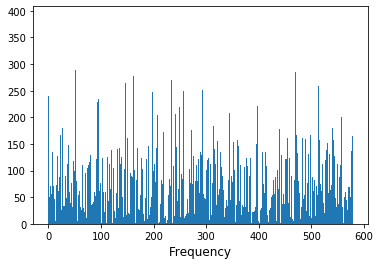

In [6]:
plt = df['cluster_num'].hist(bins=500, grid=False)
plt.set_xlabel('# of Cluster',fontsize=12);
plt.set_xlabel('Frequency',fontsize=12);

In [7]:
Data_Subset = df; 

pred_features =['danceability','energy','speechiness','instrumentalness',
               'liveness','valence','tempo','chorus_hit']
response = 'cluster_num'

x_train,x_test,y_train,y_test = train_test_split(Data_Subset[pred_features],Data_Subset[[response]],test_size=0.25)

In [75]:
import warnings
warnings.filterwarnings('ignore')
                            
num_trees = list(range(50, 650,50))

max_features = int(round(np.sqrt(len(pred_features))))
max_depth = 15
fit_forests = []; oob_mse = []; oob_score = []; 

index = 1
for num_tree in num_trees:                                 # loop over number of trees in our random forest
    fit_forests.append(RandomForestRegressor(max_depth=max_depth,n_estimators=int(num_tree),max_features = max_features,n_jobs=-1))
    fit_forests[index-1].fit(X = x_train, y = y_train)
    oob_mse.append( metrics.mean_squared_error(y_test,fit_forests[index-1].predict(x_test)) )
    oob_score.append( metrics.explained_variance_score(y_test,fit_forests[index-1].predict(x_test)) )
    print(num_tree)
    index = index + 1

50
100
150
200
250
300
350
400
450
500
550
600


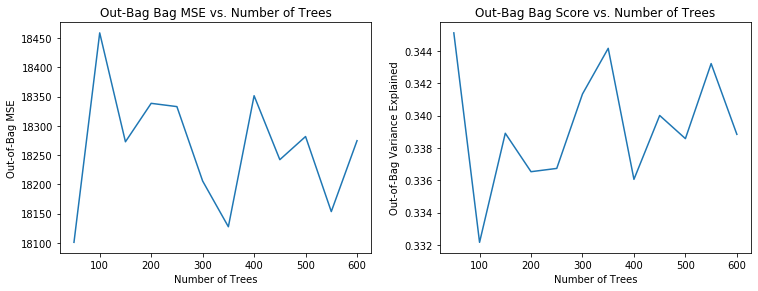

In [76]:
import matplotlib.pyplot as plt

plt.subplot(121)
plt.title('Out-Bag Bag MSE vs. Number of Trees'); 
plt.xlabel('Number of Trees')
plt.ylabel('Out-of-Bag MSE')
plt.plot(num_trees,oob_mse)

plt.subplot(122)
plt.title('Out-Bag Bag Score vs. Number of Trees'); 
plt.xlabel('Number of Trees')
plt.ylabel('Out-of-Bag Variance Explained')
plt.plot(num_trees,oob_score)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=0.8, wspace=0.22, hspace=0)

In [82]:
import warnings
warnings.filterwarnings('ignore')
                            
max_depths = list(range(10, 101,10))
num_trees = 350
fit_forests = []; oob_mse = []; oob_score = []; 

index = 1
for max_depth in max_depths:                                  
    fit_forests.append(RandomForestRegressor(max_depth=max_depth,n_estimators=int(num_tree),max_features = max_features,n_jobs=-1))
    fit_forests[index-1].fit(X = x_train, y = y_train)
    oob_mse.append( metrics.mean_squared_error(y_test,fit_forests[index-1].predict(x_test)) )
    oob_score.append( metrics.explained_variance_score(y_test,fit_forests[index-1].predict(x_test)) )
    index = index + 1
    print(max_depth)
    

10
20
30
40
50
60
70
80
90
100


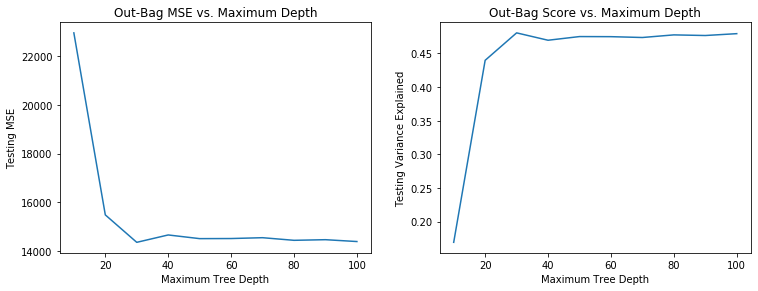

In [83]:
plt.subplot(121)
plt.title('Out-Bag MSE vs. Maximum Depth'); 
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Testing MSE')
plt.plot(max_depths,oob_mse)
plt.subplot(122)
plt.title('Out-Bag Score vs. Maximum Depth'); 
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Testing Variance Explained')
plt.plot(max_depths,oob_score)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=0.8, wspace=0.22, hspace=0)

# depth: 25
# trees: 350

In [84]:
model = RandomForestRegressor(max_depth=25,n_estimators=int(350),max_features = max_features,n_jobs=-1)

In [86]:
model.fit(X = x_train, y = y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [87]:
import joblib
filename = 'finalized_model.sav'
joblib.dump(model, filename)

['finalized_model.sav']

In [88]:
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test, y_test)
print(result)

0.4751531605350399


In [8]:
x_train

,danceability,energy,speechiness,instrumentalness,liveness,valence,tempo,chorus_hit
14271,0.373,0.610,0.0463,0.00000,0.8370,0.9040,153.239,56.16666
27360,0.475,0.310,0.0271,0.00643,0.1120,0.5900,137.559,24.37159
5439,0.398,0.547,0.0261,0.00143,0.1460,0.3050,73.396,26.95939
30949,0.315,0.798,0.0441,0.30300,0.3720,0.1600,109.753,29.93738
1219,0.287,0.777,0.0400,0.24600,0.1070,0.2400,120.041,34.33167
...,...,...,...,...,...,...,...,...
39899,0.804,0.731,0.2250,0.00000,0.0840,0.4510,89.139,23.04472
22442,0.317,0.599,0.0321,0.89700,0.1220,0.1130,124.492,37.83947
34760,0.657,0.187,0.0543,0.00000,0.1130,0.6220,89.389,28.30975
21727,0.504,0.624,0.0524,0.04550,0.0742,0.6280,117.314,18.28584
